

# Task - 9 Handwritten equation solver using CNN



# Importing the necessary libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

import pickle

# Model Building

In [7]:
data = pd.read_csv('train.csv',index_col=False)
labels = data[['784']]

In [8]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

C:\Users\vatsa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'channels_last'

In [10]:
labels=np.array(labels)

In [11]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [12]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(14326, 784)

In [15]:
temp=data.to_numpy()

In [16]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [17]:
temp.shape[0]

14326

In [18]:
X_train.shape

(14326, 28, 28, 1)

In [19]:
l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [20]:
np.random.seed(7)

In [21]:
len(l[0])

1

In [22]:
X_train.shape

(14326, 28, 28, 1)

### Building the model

In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Summary of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

### Plotting the Model

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Training the model

In [ ]:
model.fit(X_train, cat, epochs=25, batch_size=200,shuffle=True,verbose=1)

Epoch 1/25
72/72 [==============================] - 7s 75ms/step - loss: 2.8890 - accuracy: 0.4297
Epoch 2/25
19/72 [======>.......................] - ETA: 4s - loss: 0.8595 - accuracy: 0.7416

### Saving the model

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

INFO:tensorflow:Assets written to: ram://4154e963-5516-4217-bbed-b83648c4fb3a/assets


# Testing the model

In [ ]:
import cv2
import numpy as np
img = cv2.imread('Test 7.jpg',cv2.IMREAD_GRAYSCALE)

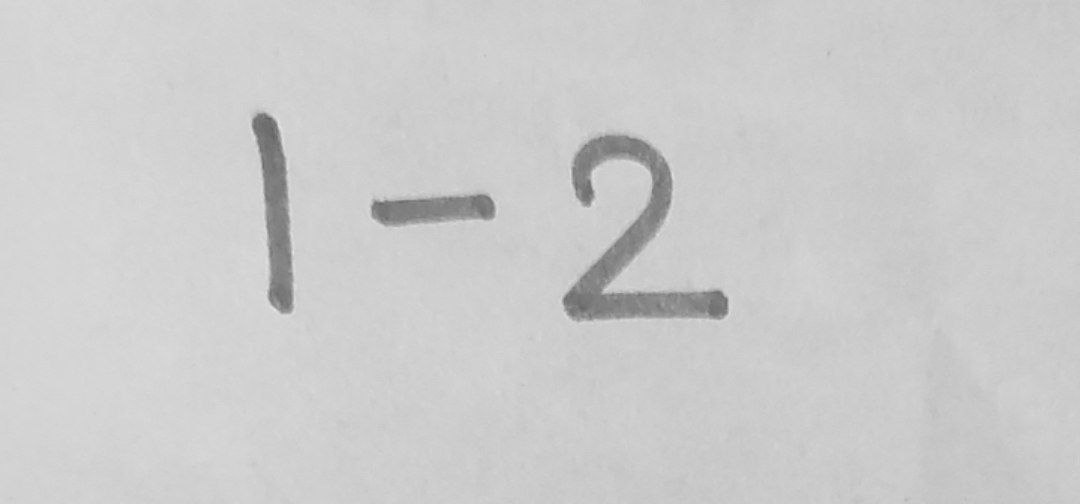

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

164
[[230, 84, 22, 155], [231, 153, 3, 3], [231, 139, 3, 4], [232, 158, 3, 3], [233, 182, 3, 3], [233, 174, 3, 4], [233, 171, 3, 4], [233, 168, 3, 4], [234, 187, 5, 4], [234, 183, 3, 4], [235, 192, 3, 4], [236, 184, 3, 3], [237, 230, 3, 3], [238, 231, 3, 3], [238, 214, 3, 3], [238, 207, 3, 4], [238, 153, 3, 5], [238, 142, 3, 4], [239, 176, 3, 3], [239, 173, 3, 4], [239, 161, 3, 3], [239, 138, 3, 4], [239, 135, 3, 4], [239, 131, 3, 3], [239, 127, 3, 3], [240, 182, 3, 3], [240, 172, 3, 3], [240, 167, 3, 4], [244, 173, 1, 2], [244, 214, 3, 3], [413, 124, 117, 86], [435, 150, 3, 3], [441, 149, 4, 3], [442, 159, 3, 3], [448, 149, 4, 3], [453, 148, 3, 3], [459, 148, 4, 3], [464, 151, 3, 3], [465, 131, 3, 3], [470, 165, 4, 8], [472, 172, 4, 7], [473, 184, 3, 6], [474, 193, 3, 3], [474, 189, 3, 4], [475, 183, 3, 4], [476, 195, 3, 4], [476, 191, 3, 3], [476, 186, 3, 4], [476, 182, 3, 3], [477, 190, 3, 3], [478, 199, 3, 3], [480, 189, 4, 8], [480, 178, 3, 5], [480, 146, 3, 3], [482, 169, 1, 1], 

In [ ]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)

1-2


In [ ]:
eval(equation)

-1

# Thank you!